# Worksheet 18

Name:  Isaac Chan
UID: U93997706

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

## Linear Regression

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

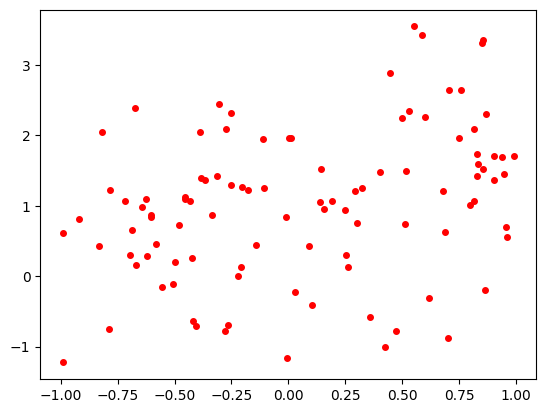

In [2]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([ 1 , 0.5 ])
x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + np.random.randn(SAMPLE_SIZE)
plt.plot(x,y,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

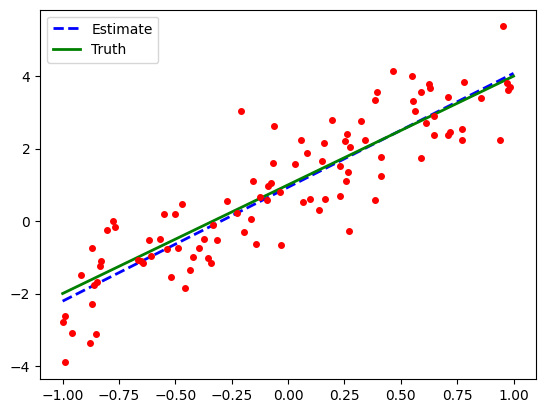

In [12]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(-1,1,50)
y_est = beta_hat[0] + beta_hat[1] * x_plot
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot, lw=2, c='g', label='Truth')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

The estimates of beta is approximately [1.024,0.436][1.024,0.436]. These values are close to the true coefficients [1.0, 0.5]
[1.0,0.5] used to generate the dataset. This proximity indicates that the least squares estimation effectively approximated 
the true underlying linear relationship, despite the presence of random noise  in the data. The slight discrepancies between 
the estimated and true values are expected due to the random variation introduced by the noise component.

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

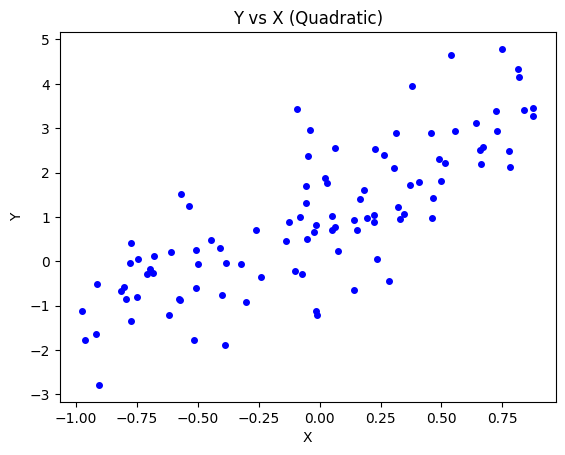

In [4]:
# Generating X values
x_quad = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)

# Generating Y values with quadratic relationship and noise
y_quad = 1 + 3 * x_quad + 0.5 * x_quad**2 + np.random.randn(SAMPLE_SIZE)

# Plotting
plt.plot(x_quad, y_quad, "bo", markersize=4)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Y vs X (Quadratic)")
plt.show()

e) Plot the least squares estimate line through the scatter plot.

f) How does the estimate of `beta` compare to the parameters we used to generate the data?

The estimated coefficients for the quadratic regression are approximately [0.959, 3.191, 1.198], compared to the generated paramters [1.0,3.0,0.5], which were used to generate the dataset. While the estimates are reasonably close, the discrepancy, especially in the quadratic term coefficient, is more pronounced than in the linear case. This difference highlights the challenges of accurately estimating parameters in more complex models, particularly under the influence of random noise. Nonetheless, the estimation does provide a fairly good approximation of the underlying quadratic relationship.

g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

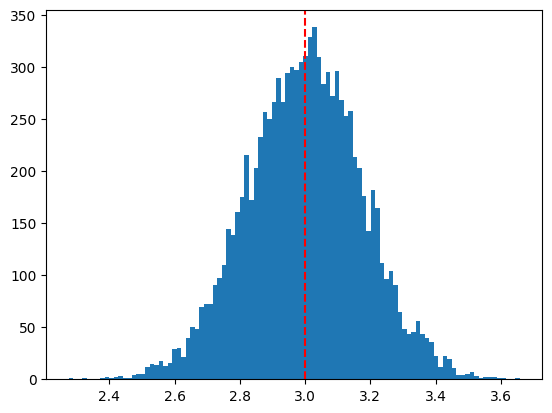

In [6]:
import numpy as np
import matplotlib.pyplot as plt

betas = []
true_beta = np.array([1, 3, 0.5])
for _ in range(10000):
    x = -1 + 2 * np.random.random(SAMPLE_SIZE)
    y = (
        true_beta[0]
        + true_beta[1] * x
        + true_beta[2] * x**2
        + np.random.randn(SAMPLE_SIZE)
    )
    intercept = np.ones(np.shape(x)[0])
    X = np.column_stack(
        (intercept, x, x**2)
    )  # Correct structure for quadratic regression
    betas.append(np.linalg.inv(X.T @ X) @ X.T @ y)

plt.hist(np.array(betas)[:, 1], bins=100)
plt.axvline(x=true_beta[1], c="r", linestyle="dashed")
plt.show()